## Introducción


El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Supóngase que existe una muestra con  $n$  individuos cada uno con  $p$  variables $(𝑋_{1},𝑋_{2},...,𝑋_{p})$, es decir, el espacio muestral tiene  ${p}$  dimensiones. PCA permite encontrar un número de factores subyacentes $(𝑧<𝑝)$ que explican aproximadamente lo mismo que las  $p$  variables originales. Donde antes se necesitaban  $𝑝$  valores para caracterizar a cada individuo, ahora bastan  $𝑧$  valores. Cada una de estas  $𝑧$  nuevas variables recibe el nombre de componente principal.

El método de PCA permite por lo tanto **"condensar"** la información aportada por múltiples variables en solo unas pocas componentes. Aun así, no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes. Dos de las principales aplicaciones del PCA son la visualización y el preprocesado de predictores previo ajuste de modelos supervisados.

La librería scikitlearn contiene la clase _sklearn.decomposition.PCA_ que implementa la mayoría de las funcionalidades necesarias para crear y utilizar modelos PCA. 

Para visualizaciones, _Yellowbrick_ ofrece funcionalidades extra.

## Cálculo de las componentes principales


Cada componente principal ($𝑍_{𝑖})$ se obtiene por combinación lineal de las variables originales. Se pueden entender como nuevas variables obtenidas al combinar de una determinada forma las variables originales. La primera componente principal de un grupo de variables $(𝑋_{1},𝑋_{2},...,𝑋_{𝑝})$ es la combinación lineal normalizada de dichas variables que tiene mayor varianza:

$$𝑍_{1} = \phi_{11}𝑋_{1}+\phi_{21}𝑋_{2}+...+\phi_{𝑝1}𝑋_{𝑝}$$

Que la combinación lineal sea normalizada implica que:

$$\sum_{𝑗=1}^{𝑝}\phi^{2}_{𝑗1} = 1$$


Los términos  $\phi_{11},...,\phi_{1𝑝}$  reciben en el nombre de loadings y son los que definen las componentes. Por ejemplo,  $\phi_{11}$  es el loading de la variable  $𝑋_{1}$  de la primera componente principal. Los **loadings pueden interpretarse como el _peso/importancia_ que tiene cada variable en cada componente, por lo tanto, ayudan a conocer que tipo de información recoge cada una de las componentes.**

Dado un set de datos  $𝑋$  con $n$ observaciones y $p$ variables, el proceso a seguir para calcular la primera componente principal es:

Centrar las variables: se resta a cada valor la media de la variable a la que pertenece. Con esto se consigue que todas las variables tengan media cero.

Se resuelve un problema de optimización para encontrar el valor de los loadings con los que se maximiza la varianza. Una forma de resolver esta optimización es mediante el cálculo de eigenvector-eigenvalue de la matriz de covarianzas.

Una vez calculada la primera componente $(𝑍_{1})$, se calcula la segunda $(𝑍_{2})$ repitiendo el mismo proceso pero añadiendo la condición de que la combinación lineal no pude estar correlacionada con la primera componente. Esto equivale a decir que  $𝑍_{1}$  y $𝑍_{2}$  tienen que ser perpendiculares. EL proceso se repite de forma iterativa hasta calcular todas las posibles componentes $(min(n-1, p))$ o hasta que se decida detener el proceso. El orden de importancia de las componentes viene dado por _la magnitud del eigenvalue asociado a cada eigenvector._

## Escalado de las variables


El proceso de PCA identifica las direcciones con mayor varianza. Como la varianza de una variable se mide en sus mismas unidades elevadas al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media cero y desviación estándar de uno, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos.


## Reproducibilidad de las componentes


El proceso de PCA estándar es determinista, genera siempre las mismas componentes principales, es decir, el valor de los loadings resultantes es el mismo. La única diferencia que puede darse es que el signo de todos los loadings esté invertido. Esto es así porque el vector de loadings determina la dirección de la componente, y dicha dirección es la misma independientemente del signo (la componente sigue una línea que se extiende en ambas direcciones). Del mismo modo, el valor específico de las componentes obtenido para cada observación (principal component scores) es siempre el mismo, a excepción del signo.


## Influencia de outliers


Al trabajar con varianzas, **el método PCA es muy sensible a outliers**, por lo que es recomendable estudiar si los hay. La detección de valores atípicos con respecto a una determinada dimensión es algo relativamente sencillo de hacer mediante comprobaciones gráficas. Sin embargo, cuando se trata con múltiples dimensiones el proceso se complica. Por ejemplo, considérese un hombre que mide 2 metros y pesa 50 kg. Ninguno de los dos valores es atípico de forma individual, pero en conjunto se trataría de un caso muy excepcional.


## Proporción de varianza explicada


Una de las preguntas más frecuentes que surge tras realizar un PCA es: _¿Cuánta información presente en el set de datos original se pierde al proyectar las observaciones en un espacio de menor dimensión?_ o lo que es lo mismo _¿Cuanta información es capaz de capturar cada una de las componentes principales obtenidas?_ Para contestar a estas preguntas se recurre a **la proporción de varianza explicada por cada componente principal.**

Asumiendo que las variables se han normalizado para tener media cero, la varianza total presente en el set de datos se define como

$$\sum_{𝑗=1}^{𝑝}𝑉𝑎𝑟(𝑋_{𝑗}) = \sum_{𝑗=1}^{𝑝}\frac{1}{𝑛}\sum_{𝑖=1}^{𝑛}𝑥^{2}_{𝑖𝑗}$$

y la varianza explicada por la componente m es

$$\frac{1}{𝑛}\sum_{𝑖=1}^{𝑛}𝑧^{2}_{𝑖𝑚} = \frac{1}{𝑛}\sum_{𝑖=1}^{𝑛}(\sum_{𝑗=1}^{𝑝}\phi_{𝑗𝑚}𝑥_{𝑖𝑗})^{2}$$

Por lo tanto, la proporción de varianza explicada por la componente m viene dada por el ratio

$$\frac{\sum^{𝑛}_{𝑖=1}(\sum^{𝑝}_{𝑗=1}\phi_{𝑗𝑚}𝑥_{𝑖𝑗})^{2}}{\sum^{𝑝}_{𝑗=1}\sum^{𝑛}_{𝑖=1}𝑥^{2}_{𝑖𝑗}}$$

Tanto la proporción de varianza explicada, como la proporción de varianza explicada acumulada, son dos valores de gran utilidad a la hora de decidir el número de componentes principales a utilizar en los análisis posteriores. Si se calculan todas las componentes principales de un set de datos, entonces, aunque transformada, se está almacenando toda la información presente en los datos originales. El sumatorio de la proporción de varianza explicada acumulada de todas las componentes es siempre 1.

## Número óptimo de componentes principales


Por lo general, dada una matriz de datos de dimensiones $nxp$, el número de componentes principales que se pueden calcular es como máximo de $n-1$ o $p$ (el menor de los dos valores es el limitante). Sin embargo, siendo el objetivo del PCA reducir la dimensionalidad, suelen ser de interés utilizar el número mínimo de componentes que resultan suficientes para explicar los datos. No existe una respuesta o método único que permita identificar cual es el número óptimo de componentes principales a utilizar. Una forma de proceder muy extendida consiste en evaluar la proporción de varianza explicada acumulada y seleccionar el número de componentes mínimo a partir del cual el incremento deja de ser sustancial.

## Ejemplo PCA

In [1]:
### Librerias ###

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Datos


El set de datos USArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP).

In [2]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
datos

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


## Exploración inicial


Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables.

La media de las variables muestra que hay tres veces más secuestros que asesinatos y 8 veces más asaltos que secuestros.

In [5]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

> La varianza es muy distinta entre las variables, en el caso de Assault, la varianza es varios órdenes de magnitud superior al resto.

In [6]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable _Assault_, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

## Modelo PCA


La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento **n_components** determina el número de componentes calculados. Si se indica None, se calculan todas las posibles $(min(filas, columnas) - 1)$.

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un StandardScaler() y un PCA() dentro de un pipeline. Para más información sobre el uso de pipelines consultar Pipeline y ColumnTransformer.

In [7]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

## Interpretación


Una vez entrenado el objeto PCA, pude accederse a toda la información de las componentes creadas.

components_ contiene el valor de los loadings  $\phi$  que definen cada componente (eigenvector). Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [8]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

$$PC1=0.535899 Murder+0.583184 Assault+0.278191 UrbanPop+0.543432 Rape$$


Los pesos asignados en la primera componente a _las variables Assault, Murder y Rape_ son aproximadamente iguales entre ellos y superiores al asignado a UrbanPoP. Esto significa que la primera componente recoge mayoritariamente la información correspondiente a los delitos. En la segunda componente, es la variable UrbanPoP es la que tiene con diferencia mayor peso, por lo que se corresponde principalmente con el nivel de urbanización del estado. Si bien en este ejemplo la interpretación de las componentes es bastante clara, no en todos los casos ocurre lo mismo, sobre todo a medida que aumenta el número de variables.

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

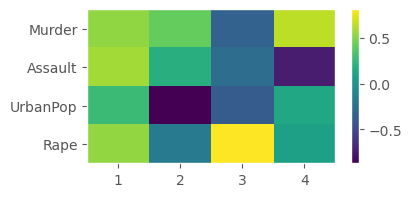

In [9]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos **explained_variance_ y explained_variance_ratio_ del modelo.**

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


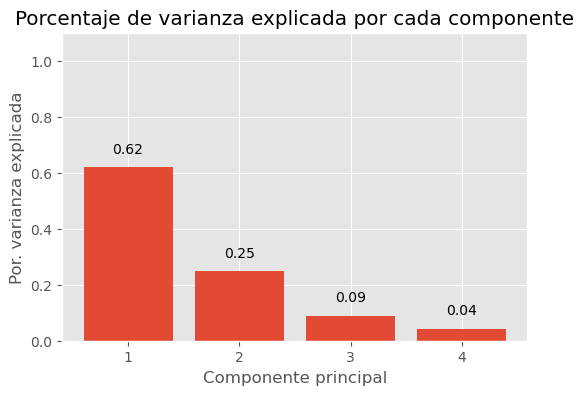

In [10]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el $62\%$ de la varianza observada en los datos y la segunda el $24.7\%$. Las dos últimas componentes no superan por separado el $1\%$ de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


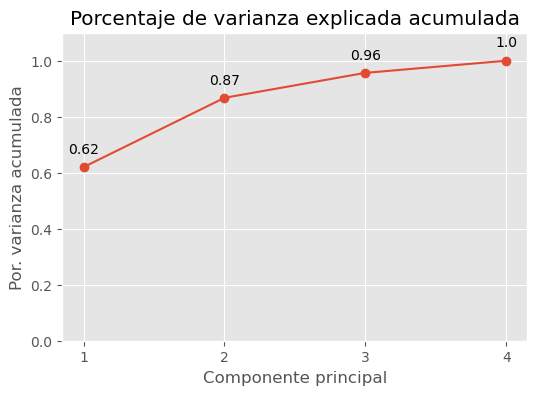

In [11]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el $87\%$ de la varianza observada.

## Trasformación


Una vez entrenado el modelo, con el método _transform()_ se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [12]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [13]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


## Reconstrucción

Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [16]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = datos.columns,
                    index   = datos.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(datos.head())

------------------
Valores originales
------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6


---------------------
Valores reconstruidos
---------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Ejemplo Principal Components Regression


El método Principal Components Regression PCR consiste en ajustar un modelo de regresión lineal por mínimos cuadrados empleando como predictores las componentes generadas a partir de un Principal Component Analysis (PCA). De esta forma, con un número reducido de componentes se puede explicar la mayor parte de la varianza de los datos.

En los estudios observacionales, es frecuente disponer de un número elevado de variables que se pueden emplear como predictores, sin embargo, esto no implica necesariamente que se disponga de mucha información. Si las variables están correlacionadas entre ellas, la información que aportan es redundante y además, se incumple la condición de no colinealidad necesaria en la regresión por mínimos cuadrados. Dado que el PCA es útil eliminando información redundante, si se emplean como predictores las componentes principales, se puede mejorar el modelo de regresión.  

Es importante tener en cuenta que, si bien el Principal Components Regression reduce el número de predictores del modelo, no se puede considerar como un método de selección de variables ya que todas ellas se necesitan para el cálculo de las componentes. La identificación del número óptimo de componentes principales que se emplean como predictores en PCR puede identificarse por validación cruzada.

In [18]:
### Librerias ###

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Datos


El departamento de calidad de una empresa de alimentación se encarga de medir el contenido en grasa de la carne que comercializa. Este estudio se realiza mediante técnicas de analítica química, un proceso relativamente costoso en tiempo y recursos. Una alternativa que permitiría reducir costes y optimizar tiempo es emplear un espectrofotómetro (instrumento capaz de detectar la absorbancia que tiene un material a diferentes tipos de luz en función de sus características) e inferir el contenido en grasa a partir de sus medidas.

Antes de dar por válida esta nueva técnica, la empresa necesita comprobar qué margen de error tiene respecto al análisis químico. Para ello, se mide el espectro de absorbancia a 100 longitudes de onda en 215 muestras de carne, cuyo contenido en grasa se obtiene también por análisis químico, y se entrena un modelo con el objetivo de predecir el contenido en grasa a partir de los valores dados por el espectrofotómetro.

In [20]:
Entrada = '/Users/ladino/Desktop/data/'
datos = pd.read_csv(Entrada + 'meatspec.csv')
datos.head(2)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.8394,2.81920,22.5
1,2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.1960,3.17942,40.1


In [21]:
# Datos
# ==============================================================================
datos = datos.drop(columns = datos.columns[0])
datos.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.8394,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.1960,3.17942,40.1


El set de datos contiene 101 columnas. Las 100 primeras, nombradas como  $𝑉_{1},...,𝑉_{100}$  recogen el valor de absorbancia para cada una de las 100 longitudes de onda analizadas (predictores), y la columna fat el contenido en grasa medido por técnicas químicas (variable respuesta).

Muchas de las variables están altamente correlacionadas (correlación absoluta > 0.8), lo que supone un problema a la hora de emplear modelos de regresión lineal.

In [22]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
1019,V11,V10,0.999996,0.999996
919,V10,V11,0.999996,0.999996
1021,V11,V12,0.999996,0.999996
1121,V12,V11,0.999996,0.999996
917,V10,V9,0.999996,0.999996


## Modelos


Se ajustan dos modelos lineales, uno con todos los predictores y otro con solo algunas de las componentes obtenidas por PCA, con el objetivo de identificar cuál de ellos es capaz de predecir mejor el contenido en grasa de la carne en función de las señales registradas por el espectrofotómetro.

Para poder evaluar la capacidad predictiva de cada modelo, se dividen las observaciones disponibles en dos grupos: **uno de entrenamiento (70%) y otro de test (30%).**

In [23]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns='fat')
y = datos['fat']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

## Mínimos cuadrados (OLS)

In [24]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

LinearRegression(normalize=True)

In [25]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 3.8396675856525686


> **Interpretación:** _Las predicciones del modelo final se alejan en promedio 3.84 unidades del valor real._

## PCA

Para _combinar PCA con regresión lineal_, se crea un pipeline que combine ambos procesos. Dado que no se puede conocer a priori el número de componentes óptimo, se recurre a validación cruzada.

In [26]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [27]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

> **Primero se evalua el modelo si se incluyen todas las componentes.**

In [36]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr_all = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr_all}")


El error (rmse) de test es: 3.3593348045226743


In [38]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 50]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
8,30,-2.710551,1.104449,-1.499120,0.071778
5,10,-2.791629,0.416056,-2.448375,0.109985
6,15,-2.842055,0.585350,-2.247184,0.099187


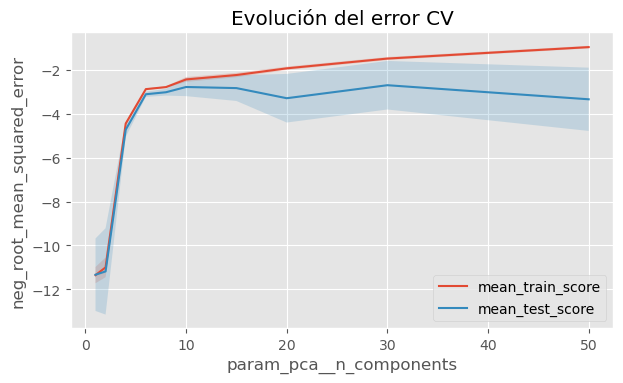

In [39]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [40]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 30} : -2.710550599148353 neg_root_mean_squared_error


> Los resultados de validación cruzada muestran que, el mejor modelo, se obtiene empleando las **30** primeras componentes. Sin embargo, teniendo en cuenta la evolución del error y su intervalo, a partir de las **5** componentes no se consiguen mejoras significativas. Siguiendo el principio de parsimonia, el mejor modelo es el que emplea únicamente las 5 primeras componentes. Se reentrena el modelo indicando esta configuración.

In [47]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=7), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=7)),
                ('linearregression', LinearRegression())])

In [48]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 3.250610407270313


## Comparación

Se compara el error de test (rmse) de los 2 modelos

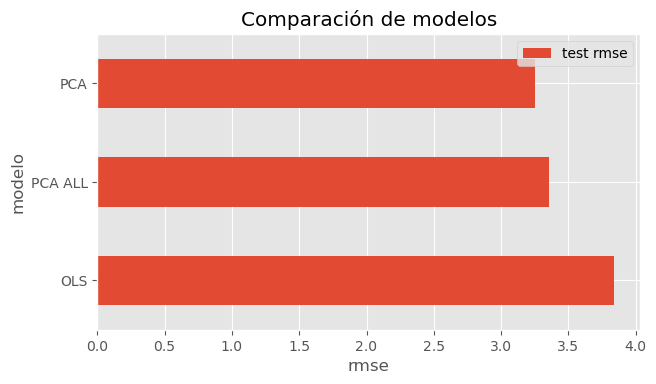

In [49]:
df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'PCA ALL', 'PCA'],
                    'test rmse': [rmse_ols, rmse_pcr_all, rmse_pcr]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

> **Interpretación:** _Empleando las **7** primeras componentes del PCA como predictores en lugar de las variables originales, se consigue reducir el root mean squared error de 3.84 a 3.25._